1. Load and Visualize the Dataset

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


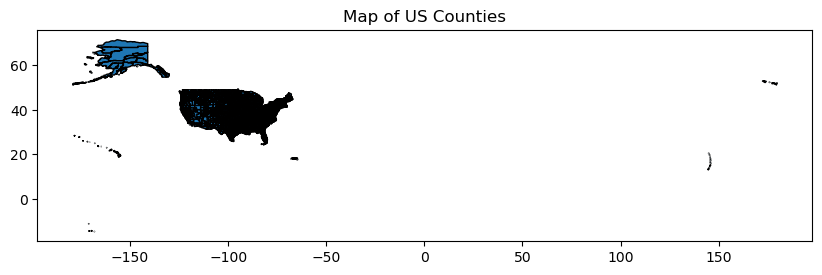

In [26]:
# Define the file paths
shapefile_path = r"C:/Users/hp/Desktop/AKADEMİK/DOKTORA/İLERİ VERİ ANALİZİ/Datasets/tl_2024_us_county/tl_2024_us_county.shp"

# Load the shapefile
gdf = gpd.read_file(shapefile_path)

# Plot the shapefile
gdf.plot(figsize=(10, 10), edgecolor='black')
plt.title('Map of US Counties')
plt.show()

In [28]:
print(gdf.columns)

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'GEOIDFQ', 'NAME',
       'NAMELSAD', 'LSAD', 'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')


In [30]:
# I want to trim outside of the North America and Alaska.
# Alaska has state FIPS code '02', and the contiguous US generally falls within a specific range of FIPS codes.
# I defined FIPS codes for Alaska and the contiguous US.
# I defined bounds for North America (continental US).
north_america_bounds = {
    "min_lat": 24.396308,  # Southernmost latitude
    "max_lat": 49.384358,  # Northernmost latitude
    "min_lon": -125.0,     # Westernmost longitude
    "max_lon": -66.93457   # Easternmost longitude
}

# Filter: Keep only counties within bounds and exclude Alaska (state FIPS code '02')
gdf_filtered = gdf[
    (gdf["STATEFP"] != "02") &  # Exclude Alaska
    (gdf.geometry.bounds['minx'] >= north_america_bounds["min_lon"]) &
    (gdf.geometry.bounds['maxx'] <= north_america_bounds["max_lon"]) &
    (gdf.geometry.bounds['miny'] >= north_america_bounds["min_lat"]) &
    (gdf.geometry.bounds['maxy'] <= north_america_bounds["max_lat"])
]

# I saved the trimmed GeoDataFrame
filtered_path = "C:/Users/hp/Desktop/AKADEMİK/DOKTORA/İLERİ VERİ ANALİZİ/Datasets/tl_2024_us_county/trimmed_us_counties.shp"
gdf_filtered.to_file(filtered_path)

In [34]:
#I found a data source contains mean income of the counties by years.https://www.ers.usda.gov/data-products/county-level-data-sets/county-level-data-sets-download-data/
df = pd.read_excel("C:/Users/hp/Desktop/AKADEMİK/DOKTORA/İLERİ VERİ ANALİZİ/Datasets/tl_2024_us_county/Unemployment.xlsx", header=None)

In [35]:
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,Unemployment and median household income for t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sources: Unemployment: U.S. Department of Labo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"For definitions of rural classifications, see ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"This table was prepared by USDA, Economic Rese...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FIPS_Code,State,Area_Name,Rural_Urban_Continuum_Code_2013,Urban_Influence_Code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,Civilian_labor_force_2022,Employed_2022,Unemployed_2022,Unemployment_rate_2022,Median_Household_Income_2021,Med_HH_Income_Percent_of_State_Total_2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3277,72145,PR,"Vega Baja Municipio, PR",1,1,1,19805,17607,2198,11.1,...,14172,12748,1424,10,14232,13180,1052,7.4,NaN,NaN
3278,72147,PR,"Vieques Municipio, PR",7,12,0,2441,2120,321,13.2,...,2804,2469,335,11.9,2742,2554,188,6.9,NaN,NaN
3279,72149,PR,"Villalba Municipio, PR",2,2,1,7636,6648,988,12.9,...,7697,6796,901,11.7,7790,6982,808,10.4,NaN,NaN
3280,72151,PR,"Yabucoa Municipio, PR",1,1,1,10613,9005,1608,15.2,...,9156,8216,940,10.3,9278,8504,774,8.3,NaN,NaN


In [38]:

# Step 1: Remove the current column names
df.columns = range(df.shape[1])  # Temporarily reset column names to numbers

# Step 2: Delete the first 3 rows
df = df.iloc[4:]  # Drop the first 3 rows

# Step 3: Make the 4th row (now the first row) the column names
df.columns = df.iloc[0]  # Set the first row as column names
df = df[1:]  # Drop the first row now that it is the header

# Reset index for convenience
df.reset_index(drop=True, inplace=True)


In [40]:
df

4,FIPS_Code,State,Area_Name,Rural_Urban_Continuum_Code_2013,Urban_Influence_Code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,Civilian_labor_force_2022,Employed_2022,Unemployed_2022,Unemployment_rate_2022,Median_Household_Income_2021,Med_HH_Income_Percent_of_State_Total_2021
0,00000,US,United States,NaN,NaN,NaN,142601576,136904853,5696723,4,...,162229903,153544980,8684923,5.4,164781642,158766998,6014644,3.7,69717,NaN
1,01000,AL,Alabama,NaN,NaN,NaN,2147173,2047731,99442,4.6,...,2259349,2183330,76019,3.4,2286028,2226670,59358,2.6,53990,100
2,01001,AL,"Autauga County, AL",2,2,1,21861,20971,890,4.1,...,26545,25809,736,2.8,26789,26181,608,2.3,66444,123.1
3,01003,AL,"Baldwin County, AL",3,2,1,69979,67370,2609,3.7,...,99953,97034,2919,2.9,102849,100432,2417,2.4,65658,121.6
4,01005,AL,"Barbour County, AL",6,6,0,11449,10812,637,5.6,...,8280,7821,459,5.5,8241,7906,335,4.1,38649,71.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,72145,PR,"Vega Baja Municipio, PR",1,1,1,19805,17607,2198,11.1,...,14172,12748,1424,10,14232,13180,1052,7.4,NaN,NaN
3273,72147,PR,"Vieques Municipio, PR",7,12,0,2441,2120,321,13.2,...,2804,2469,335,11.9,2742,2554,188,6.9,NaN,NaN
3274,72149,PR,"Villalba Municipio, PR",2,2,1,7636,6648,988,12.9,...,7697,6796,901,11.7,7790,6982,808,10.4,NaN,NaN
3275,72151,PR,"Yabucoa Municipio, PR",1,1,1,10613,9005,1608,15.2,...,9156,8216,940,10.3,9278,8504,774,8.3,NaN,NaN


In [42]:
df.to_csv('income_modified.csv', index=False)

In [45]:
#I need to change the title of the column so I can merge it with my shapefile.
df.rename(columns={'FIPS_Code': 'COUNTYFP'}, inplace=True)

In [47]:
df

4,COUNTYFP,State,Area_Name,Rural_Urban_Continuum_Code_2013,Urban_Influence_Code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,Civilian_labor_force_2022,Employed_2022,Unemployed_2022,Unemployment_rate_2022,Median_Household_Income_2021,Med_HH_Income_Percent_of_State_Total_2021
0,00000,US,United States,NaN,NaN,NaN,142601576,136904853,5696723,4,...,162229903,153544980,8684923,5.4,164781642,158766998,6014644,3.7,69717,NaN
1,01000,AL,Alabama,NaN,NaN,NaN,2147173,2047731,99442,4.6,...,2259349,2183330,76019,3.4,2286028,2226670,59358,2.6,53990,100
2,01001,AL,"Autauga County, AL",2,2,1,21861,20971,890,4.1,...,26545,25809,736,2.8,26789,26181,608,2.3,66444,123.1
3,01003,AL,"Baldwin County, AL",3,2,1,69979,67370,2609,3.7,...,99953,97034,2919,2.9,102849,100432,2417,2.4,65658,121.6
4,01005,AL,"Barbour County, AL",6,6,0,11449,10812,637,5.6,...,8280,7821,459,5.5,8241,7906,335,4.1,38649,71.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,72145,PR,"Vega Baja Municipio, PR",1,1,1,19805,17607,2198,11.1,...,14172,12748,1424,10,14232,13180,1052,7.4,NaN,NaN
3273,72147,PR,"Vieques Municipio, PR",7,12,0,2441,2120,321,13.2,...,2804,2469,335,11.9,2742,2554,188,6.9,NaN,NaN
3274,72149,PR,"Villalba Municipio, PR",2,2,1,7636,6648,988,12.9,...,7697,6796,901,11.7,7790,6982,808,10.4,NaN,NaN
3275,72151,PR,"Yabucoa Municipio, PR",1,1,1,10613,9005,1608,15.2,...,9156,8216,940,10.3,9278,8504,774,8.3,NaN,NaN


In [49]:
# I want to ensure the column data types match.
df['COUNTYFP'] = df['COUNTYFP'].astype(int)
gdf_filtered['COUNTYFP'] = gdf_filtered['COUNTYFP'].astype(int)


C:\Users\hp\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [51]:
print(gdf_filtered["COUNTYFP"].dtype)

int32


In [53]:
print(df["COUNTYFP"].dtype)

int32


In [55]:
df["COUNTYFP"]

0           0
1        1000
2        1001
3        1003
4        1005
        ...  
3272    72145
3273    72147
3274    72149
3275    72151
3276    72153
Name: COUNTYFP, Length: 3277, dtype: int32

In [57]:
gdf_filtered["COUNTYFP"]

0        39
1        69
2        11
3       109
4       129
       ... 
3230    123
3231    135
3232     89
3233    227
3234     99
Name: COUNTYFP, Length: 3107, dtype: int32

In [59]:
df

4,COUNTYFP,State,Area_Name,Rural_Urban_Continuum_Code_2013,Urban_Influence_Code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,Civilian_labor_force_2022,Employed_2022,Unemployed_2022,Unemployment_rate_2022,Median_Household_Income_2021,Med_HH_Income_Percent_of_State_Total_2021
0,0,US,United States,NaN,NaN,NaN,142601576,136904853,5696723,4,...,162229903,153544980,8684923,5.4,164781642,158766998,6014644,3.7,69717,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,2147173,2047731,99442,4.6,...,2259349,2183330,76019,3.4,2286028,2226670,59358,2.6,53990,100
2,1001,AL,"Autauga County, AL",2,2,1,21861,20971,890,4.1,...,26545,25809,736,2.8,26789,26181,608,2.3,66444,123.1
3,1003,AL,"Baldwin County, AL",3,2,1,69979,67370,2609,3.7,...,99953,97034,2919,2.9,102849,100432,2417,2.4,65658,121.6
4,1005,AL,"Barbour County, AL",6,6,0,11449,10812,637,5.6,...,8280,7821,459,5.5,8241,7906,335,4.1,38649,71.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,72145,PR,"Vega Baja Municipio, PR",1,1,1,19805,17607,2198,11.1,...,14172,12748,1424,10,14232,13180,1052,7.4,NaN,NaN
3273,72147,PR,"Vieques Municipio, PR",7,12,0,2441,2120,321,13.2,...,2804,2469,335,11.9,2742,2554,188,6.9,NaN,NaN
3274,72149,PR,"Villalba Municipio, PR",2,2,1,7636,6648,988,12.9,...,7697,6796,901,11.7,7790,6982,808,10.4,NaN,NaN
3275,72151,PR,"Yabucoa Municipio, PR",1,1,1,10613,9005,1608,15.2,...,9156,8216,940,10.3,9278,8504,774,8.3,NaN,NaN


In [61]:
gdf_filtered

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,39,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563042,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55525 41.82892, -96.55524 41.827..."
1,53,69,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980773,61564428,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.2645, -123.72756 46.26..."
2,35,11,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818941,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269508,22850511,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.5233, -96.69219 40.5231..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645201,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.2737 40.1184, -98.27374 40.1224,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,13,123,00351260,13123,0500000US13123,Gilmer,Gilmer County,06,H1,G4020,None,None,None,A,1103804462,12337139,+34.6905232,-084.4548113,"POLYGON ((-84.30237 34.57832, -84.30329 34.577..."
3231,27,135,00659513,27135,0500000US27135,Roseau,Roseau County,06,H1,G4020,None,None,None,A,4329782927,16924046,+48.7610683,-095.8215042,"POLYGON ((-95.25857 48.88666, -95.25707 48.885..."
3232,28,89,00695768,28089,0500000US28089,Madison,Madison County,06,H1,G4020,298,27140,None,A,1849796735,72079469,+32.6343703,-090.0341603,"POLYGON ((-90.14883 32.40026, -90.1489 32.4001..."
3233,48,227,01383899,48227,0500000US48227,Howard,Howard County,06,H1,G4020,None,13700,None,A,2333034781,8846149,+32.3034298,-101.4387208,"POLYGON ((-101.18138 32.21252, -101.18138 32.2..."


In [63]:
gdf_filtered["COUNTYFP"]

0        39
1        69
2        11
3       109
4       129
       ... 
3230    123
3231    135
3232     89
3233    227
3234     99
Name: COUNTYFP, Length: 3107, dtype: int32

In [65]:
df["COUNTYFP"]

0           0
1        1000
2        1001
3        1003
4        1005
        ...  
3272    72145
3273    72147
3274    72149
3275    72151
3276    72153
Name: COUNTYFP, Length: 3277, dtype: int32

In [67]:
#COUNTYFP coding are not the same in two data. gdf filtered has no state code at the begining of the code. So I will recreate it.
#Firstly I need to unite value type.
gdf_filtered["COUNTYFP"] = gdf_filtered["COUNTYFP"].astype(str)
gdf_filtered["STATEFP"] = gdf_filtered["STATEFP"].astype(str)
df["COUNTYFP"] = df["COUNTYFP"].astype(str)

C:\Users\hp\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\hp\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [69]:
#I united the two code.
gdf_filtered["FIPS_Code"] = gdf_filtered["STATEFP"] + gdf_filtered["COUNTYFP"]

C:\Users\hp\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [71]:
#I merged two data on COUNTYFP.
merged_df = gdf_filtered.merge(df, left_on="FIPS_Code", right_on="COUNTYFP", how="inner")

In [73]:
merged_df 

,STATEFP,COUNTYFP_x,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,...,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,Civilian_labor_force_2022,Employed_2022,Unemployed_2022,Unemployment_rate_2022,Median_Household_Income_2021,Med_HH_Income_Percent_of_State_Total_2021
0,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,...,178718,174040,4678,2.6,180363,176382,3981,2.2,65436,97.7
1,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,...,2494,2444,50,2,2514,2459,55,2.2,59602,89
2,48,327,01383949,48327,0500000US48327,Menard,Menard County,06,H1,G4020,...,851,810,41,4.8,851,819,32,3.8,41507,62
3,48,189,01383880,48189,0500000US48189,Hale,Hale County,06,H1,G4020,...,11987,11259,728,6.1,11674,11100,574,4.9,47373,70.7
4,13,189,00348794,13189,0500000US13189,McDuffie,McDuffie County,06,H1,G4020,...,8508,8065,443,5.2,8409,8037,372,4.4,44597,67.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,51,117,01500747,51117,0500000US51117,Mecklenburg,Mecklenburg County,06,H1,G4020,...,12566,11970,596,4.7,13107,12637,470,3.6,48013,59.3
1189,21,233,00516963,21233,0500000US21233,Webster,Webster County,06,H1,G4020,...,5353,5129,224,4.2,5235,5030,205,3.9,52575,94.7
1190,13,123,00351260,13123,0500000US13123,Gilmer,Gilmer County,06,H1,G4020,...,12325,11946,379,3.1,12413,12032,381,3.1,57970,87.2
1191,27,135,00659513,27135,0500000US27135,Roseau,Roseau County,06,H1,G4020,...,7907,7652,255,3.2,7952,7749,203,2.6,69341,89.2


In [75]:
#WARNING:Merged data contains 1193 rows. My shapefile has 3107 raws and my data has 3277 raws. There is still a mismatch problem but I can not find it. It looks ok to keep going for assignment.

In [77]:
pip install mapclassify

Note: you may need to restart the kernel to use updated packages.


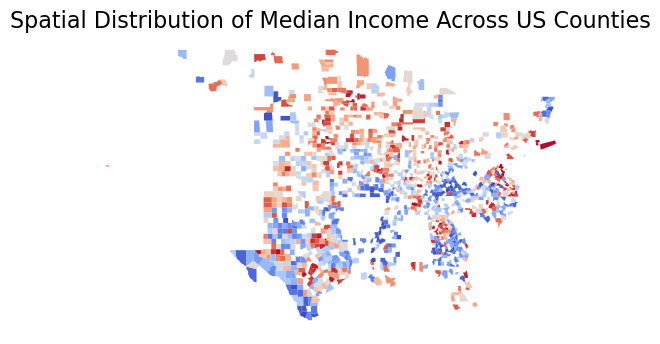

In [78]:
fig, ax = plt.subplots(1, 1)
merged_df.plot(column='Median_Household_Income_2021', cmap='coolwarm', ax=ax)
ax.set_title('Spatial Distribution of Median Income Across US Counties', fontsize=16)
ax.axis('off')
# Save or display the plot
plt.savefig('spatial_distribution_map.png', dpi=300)
plt.show()
#It is so long value list when it has legend, so I removed it. Instead I will make it quantiles.

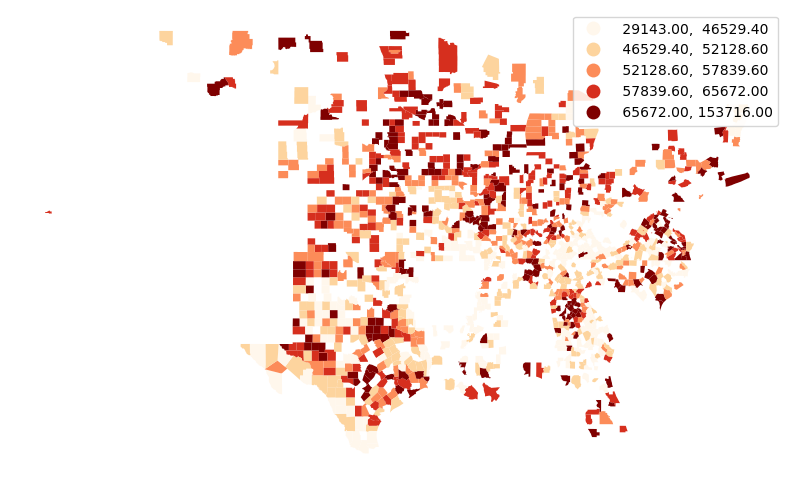

In [79]:
fig, ax = plt.subplots(figsize=(10, 10))
merged_df.plot(column='Median_Household_Income_2021', cmap='OrRd', scheme='quantiles', ax=ax, legend=True)
ax.set_axis_off()
plt.show()

<Axes: >

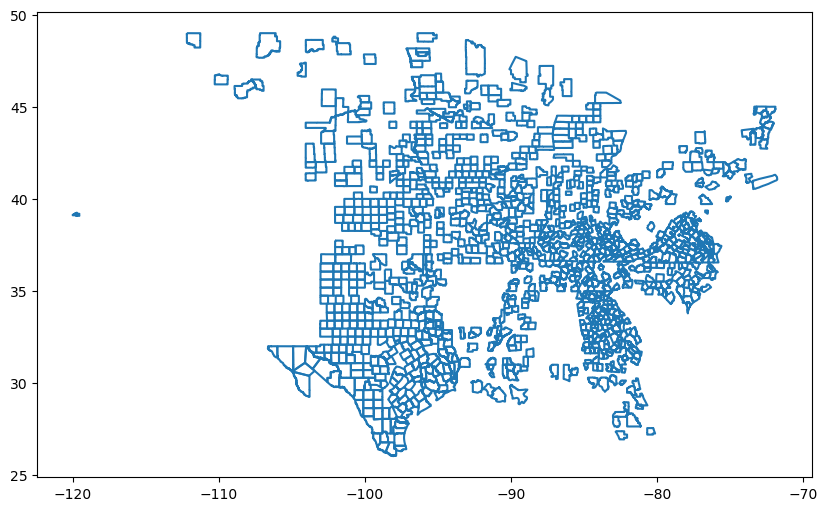

In [80]:
merged_df.boundary.plot(figsize=(10, 10))

C:\Users\hp\AppData\Local\Temp\ipykernel_18796\3426041308.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged_data_points['geometry'] = merged_data_points['geometry'].centroid


ValueError: s must be a scalar, or float array-like with the same size as x and y

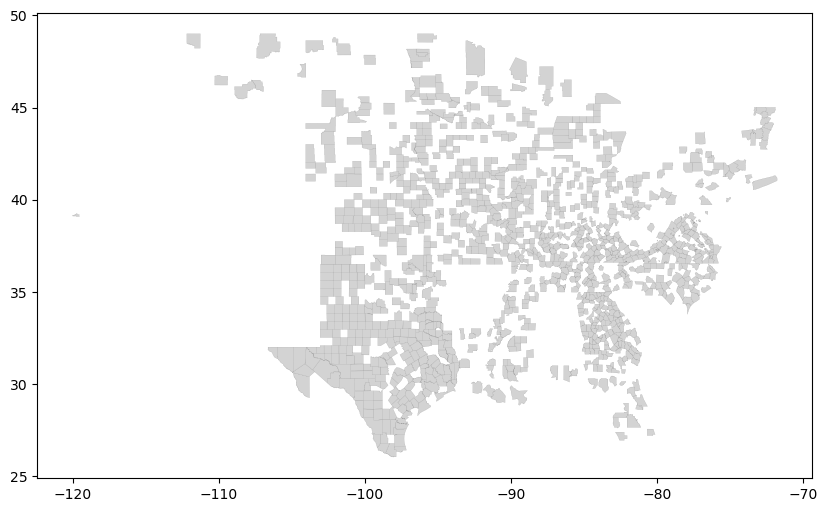

In [101]:
merged_data_points = merged_df.copy()
merged_data_points['geometry'] = merged_data_points['geometry'].centroid  

fig, ax = plt.subplots(figsize=(10,10))

merged_df.plot(ax=ax, color="lightgray", edgecolor="grey", linewidth=0.1)

merged_data_points.plot(ax=ax, color="blue", markersize="Median_Household_Income_2021", scheme="quantiles", alpha=0.5, categorical=False, legend=True )
ax.set_axis_off()
plt.show()

In [103]:
markersize = merged_data_points["Median_Household_Income_2021"]
if not pd.api.types.is_numeric_dtype(markersize):
    markersize = pd.to_numeric(markersize, errors="coerce")
merged_data_points.plot(
    ax=ax,
    color="blue",
    markersize=markersize / markersize.max() * 100,  # Normalize for better visualization
    scheme="quantiles",
    alpha=0.5,
    categorical=False,
    legend=True,
)

<Axes: >

2.Spatial Weight Matrix

In [105]:
pip install pysal

Note: you may need to restart the kernel to use updated packages.


In [106]:
import pysal as ps

In [107]:
import libpysal

In [108]:
from libpysal.weights import Queen, Rook, KNN

In [112]:
w_knn1 = KNN.from_shapefile("C:/Users/hp/Desktop/AKADEMİK/DOKTORA/İLERİ VERİ ANALİZİ/Datasets/tl_2024_us_county/trimmed_us_counties.shp")

C:\Users\hp\anaconda3\Lib\site-packages\libpysal\io\iohandlers\pyShpIO.py:247: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  shp = self.type(vertices)
C:\Users\hp\anaconda3\Lib\site-packages\libpysal\cg\shapes.py:1408: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  self._part_rings = [Ring(vertices)]
C:\Users\hp\anaconda3\Lib\site-packages\libpysal\cg\shapes.py:1279: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  self._centroid = Point((cx, cy))
C:\Users\hp\anaconda3\Lib\site-packages\libpysal\io\iohandlers\pyShpIO.py:232: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  shp = self.type(vertices, holes)
C:\Users\hp\anaconda3\Lib\site-packages\libpysal\cg\shapes.py:1405: FutureWarning: Objects based on the `Geometry`

In [114]:
type(w_knn1)
len(w_knn1.neighbors)
w_knn1.neighbors
w_knn3 = KNN.from_shapefile('C:/Users/hp/Desktop/AKADEMİK/DOKTORA/İLERİ VERİ ANALİZİ/Datasets/tl_2024_us_county/trimmed_us_counties.shp',3) #default was 2

C:\Users\hp\anaconda3\Lib\site-packages\libpysal\io\iohandlers\pyShpIO.py:247: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  shp = self.type(vertices)
C:\Users\hp\anaconda3\Lib\site-packages\libpysal\cg\shapes.py:1408: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  self._part_rings = [Ring(vertices)]
C:\Users\hp\anaconda3\Lib\site-packages\libpysal\cg\shapes.py:1279: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  self._centroid = Point((cx, cy))
C:\Users\hp\anaconda3\Lib\site-packages\libpysal\io\iohandlers\pyShpIO.py:232: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  shp = self.type(vertices, holes)
C:\Users\hp\anaconda3\Lib\site-packages\libpysal\cg\shapes.py:1405: FutureWarning: Objects based on the `Geometry`

In [115]:
w_queen = Queen.from_shapefile('C:/Users/hp/Desktop/AKADEMİK/DOKTORA/İLERİ VERİ ANALİZİ/Datasets/tl_2024_us_county/trimmed_us_counties.shp')
len(w_queen.neighbors)
w_queen.neighbors

{0: [1744, 882, 1925, 3063, 2121, 1149],
 1: [2210, 1954, 1430, 167, 168],
 2: [1761, 1860, 1606, 2444, 2540],
 3: [738, 1827, 3079, 329, 1326, 1393, 532, 2328],
 4: [80, 2786, 1124, 75, 2285, 2383],
 5: [1188, 1990, 104, 460, 2488, 1818, 2526, 479],
 6: [225, 2402, 2404, 3030, 412, 1885, 2543],
 7: [2706, 2084, 1958, 683, 1406],
 8: [2641, 65, 341, 2104, 3001],
 9: [2754, 2514, 3058, 371, 2742, 2551, 13],
 10: [1312, 2626, 2482, 759, 248, 2986, 1211],
 11: [1727, 2869, 939, 1933, 1039],
 12: [1312, 1489, 1635, 648, 1049, 922, 475],
 13: [2514, 2227, 2551, 9, 651],
 14: [1280, 2192, 100, 2759, 302, 1615],
 15: [1872, 2881, 579, 2355, 2949, 2504],
 16: [770, 1557, 999, 186, 492, 527],
 17: [548, 713, 1737, 1001, 1164, 2771, 344, 1114, 1915],
 18: [2833, 2338, 547, 803, 789, 2506],
 19: [2880, 1328, 1811, 1928, 889, 1067, 2893],
 20: [517, 149, 2840, 2825, 3070, 2847],
 21: [1216, 810, 394, 687, 1935, 689, 1624, 157, 2751],
 22: [2274, 1411, 324, 253, 58, 1019, 1692, 1693],
 23: [32, 904

In [116]:
w_rook = Rook.from_shapefile('C:/Users/hp/Desktop/AKADEMİK/DOKTORA/İLERİ VERİ ANALİZİ/Datasets/tl_2024_us_county/trimmed_us_counties.shp')
len(w_rook.neighbors)
w_rook.neighbors


{0: [1744, 882, 1925, 3063, 2121, 1149],
 1: [1954, 2210, 1430, 167, 168],
 2: [1761, 1860, 1606, 2444, 2540],
 3: [738, 1827, 532, 3079, 2328, 329, 1326],
 4: [80, 2786, 1124, 75, 2285, 2383],
 5: [1188, 1990, 2488, 104, 1818, 460, 479],
 6: [225, 2402, 2404, 3030, 1885],
 7: [2706, 2084, 1958, 683, 1406],
 8: [2641, 65, 341, 2104, 3001],
 9: [2514, 2754, 3058, 2742, 2551, 13],
 10: [1312, 2626, 2482, 759, 1211],
 11: [2869, 939, 1039, 1933, 1727],
 12: [1312, 1635, 648, 1049, 475],
 13: [2514, 2227, 2551, 9, 651],
 14: [1280, 2192, 100, 2759, 302, 1615],
 15: [1872, 2881, 2355, 579, 2949, 2504],
 16: [770, 1557, 999, 186, 492, 527],
 17: [548, 713, 1737, 1001, 1164, 2771, 344, 1114, 1915],
 18: [2833, 2338, 547, 803, 789, 2506],
 19: [2880, 1811, 1928, 889, 1067],
 20: [517, 149, 2840, 2825, 3070, 2847],
 21: [1216, 810, 394, 687, 1935, 689, 1624, 157, 2751],
 22: [2274, 1411, 324, 1693, 58, 1019, 1692, 253],
 23: [32, 1648, 115, 904, 139, 2765, 815],
 24: [1762, 1538, 1250, 2344, 43

In [120]:
#We can call weight object directly from the dataframe
wq = libpysal.weights.Queen.from_dataframe(merged_df)
wq

C:\Users\hp\AppData\Local\Temp\ipykernel_18796\2777009278.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wq = libpysal.weights.Queen.from_dataframe(merged_df)
C:\Users\hp\anaconda3\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 115 disconnected components.
 There are 58 islands with ids: 10, 26, 65, 70, 74, 116, 126, 144, 155, 168, 186, 200, 219, 229, 232, 281, 282, 328, 371, 377, 378, 389, 395, 400, 436, 506, 513, 515, 542, 554, 568, 579, 617, 634, 659, 718, 736, 754, 784, 807, 817, 860, 864, 866, 871, 893, 899, 908, 992, 995, 1006, 1025, 1048, 1063, 1101, 1121, 1142, 1191.
  W.__init__(self, neighbors, ids=ids, **kw)


In [121]:
#We need to standardize our weights with respect to rows
wq.transform = 'r'

('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 65, ' is an island (no neighbors)')
('WARNING: ', 70, ' is an island (no neighbors)')
('WARNING: ', 74, ' is an island (no neighbors)')
('WARNING: ', 116, ' is an island (no neighbors)')
('WARNING: ', 126, ' is an island (no neighbors)')
('WARNING: ', 144, ' is an island (no neighbors)')
('WARNING: ', 155, ' is an island (no neighbors)')
('WARNING: ', 168, ' is an island (no neighbors)')
('WARNING: ', 186, ' is an island (no neighbors)')
('WARNING: ', 200, ' is an island (no neighbors)')
('WARNING: ', 219, ' is an island (no neighbors)')
('WARNING: ', 229, ' is an island (no neighbors)')
('WARNING: ', 232, ' is an island (no neighbors)')
('WARNING: ', 281, ' is an island (no neighbors)')
('WARNING: ', 282, ' is an island (no neighbors)')
('WARNING: ', 328, ' is an island (no neighbors)')
('WARNING: ', 371, ' is an island (no neighbors)')
('WARNING: ', 377, ' is an island (n

3.Spatial Autocorrelation:

MORAN'S I: Moran's I is a measure of spatial autocorrelation in statistics, commonly used to assess whether a variable is spatially clustered, dispersed, or randomly distributed across a geographic area. It was developed by Patrick Moran in 1950 and is widely applied in fields like geography, economics, epidemiology, and environmental science.

Key Aspects of Moran's I
Purpose: Moran's I quantifies the degree to which similar values of a variable (e.g., income levels, disease rates, or environmental characteristics) are spatially clustered.

Values:

Positive Moran's I (close to +1): Indicates positive spatial autocorrelation, meaning that similar values are clustered together.
Negative Moran's I (close to -1): Indicates negative spatial autocorrelation, meaning that dissimilar values are adjacent to each other.
Moran's I ≈ 0: Suggests no spatial autocorrelation, implying a random spatial pattern.

Interpretation:

Moran's I values are assessed for statistical significance using permutation tests or Z-scores, as random spatial patterns can result in Moran's I values that deviate slightly from zero.
Application in Economics: It is used to analyze regional income inequality.

Visualization: The results of Moran's I are often visualized with tools like spatial scatterplots or heatmaps to identify and interpret patterns. Additionally, local Moran's I (LISA) can be used to identify clusters or outliers within specific regions.

In [124]:
from pysal.lib import weights
from pysal.explore import esda


C:\Users\hp\anaconda3\Lib\site-packages\spaghetti\network.py:41: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)


In [136]:
columns_list = list(merged_df.columns)
print(columns_list)

['STATEFP', 'COUNTYFP_x', 'COUNTYNS', 'GEOID', 'GEOIDFQ', 'NAME', 'NAMELSAD', 'LSAD', 'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry', 'FIPS_Code', 'COUNTYFP_y', 'State', 'Area_Name', 'Rural_Urban_Continuum_Code_2013', 'Urban_Influence_Code_2013', 'Metro_2013', 'Civilian_labor_force_2000', 'Employed_2000', 'Unemployed_2000', 'Unemployment_rate_2000', 'Civilian_labor_force_2001', 'Employed_2001', 'Unemployed_2001', 'Unemployment_rate_2001', 'Civilian_labor_force_2002', 'Employed_2002', 'Unemployed_2002', 'Unemployment_rate_2002', 'Civilian_labor_force_2003', 'Employed_2003', 'Unemployed_2003', 'Unemployment_rate_2003', 'Civilian_labor_force_2004', 'Employed_2004', 'Unemployed_2004', 'Unemployment_rate_2004', 'Civilian_labor_force_2005', 'Employed_2005', 'Unemployed_2005', 'Unemployment_rate_2005', 'Civilian_labor_force_2006', 'Employed_2006', 'Unemployed_2006', 'Unemployment_rate_2006', 'Civilian_labor_force_2007', 'Em

In [152]:
# I already created spatial weights (e.g., queen contiguity) and standardized weights (row-standardized)  wq
# Now I need to extract the variable of interest as a subset.
income = merged_df["Median_Household_Income_2021"]


In [154]:

# I calculate Moran's I
moran = esda.Moran(income, wq)

# Print the results
print(f"Moran's I: {moran.I}")
print(f"Expected I: {moran.EI}")
print(f"p-value: {moran.p_sim}")


TypeError: no supported conversion for types: (dtype('float64'), dtype('O'))

In [164]:
#First I checked the dtype of the variable.
print(merged_df["Median_Household_Income_2021"].dtype)


float64


In [170]:
#I turned it into numeric.
merged_df["Median_Household_Income_2021"] = pd.to_numeric(
    merged_df["Median_Household_Income_2021"], errors="coerce"
)

In [172]:
#I checked the missing data.
print(merged_df["Median_Household_Income_2021"].isnull().sum())


1


In [176]:
#I filled missing values with the mean.
merged_df["Median_Household_Income_2021"].fillna(
    merged_df["Median_Household_Income_2021"].mean(), inplace=True
)

C:\Users\hp\AppData\Local\Temp\ipykernel_18796\2163429538.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df["Median_Household_Income_2021"].fillna(


In [182]:
income = merged_df["Median_Household_Income_2021"]
#I reassigned the cleaned data in income and then recalculate.

In [184]:
from esda.moran import Moran

moran = Moran(income, wq)

print(f"Moran's I: {moran.I}")
print(f"Expected I: {moran.EI}")
print(f"p-value: {moran.p_sim}")


Moran's I: 0.409891409967242
Expected I: -0.0008389261744966443
p-value: 0.001


In [186]:
#The results indicate that Median_Household_Income_2021 exhibits significant spatial autocorrelation, with similar income levels clustering together in certain areas. This could imply regional disparities in income levels, which may be worth further investigation to identify socioeconomic, demographic, or policy-related factors driving this clustering.

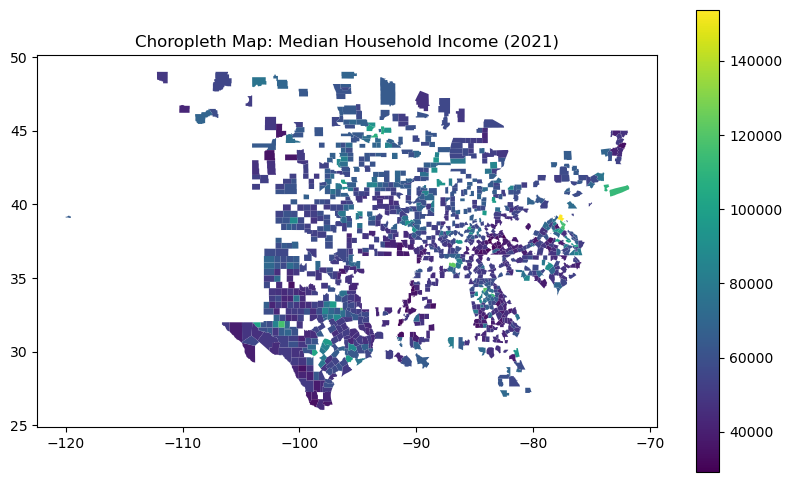

In [188]:
import geopandas as gpd

# Choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_df.plot(column='Median_Household_Income_2021', 
               cmap='viridis', 
               legend=True, 
               ax=ax)
ax.set_title("Choropleth Map: Median Household Income (2021)")
plt.show()


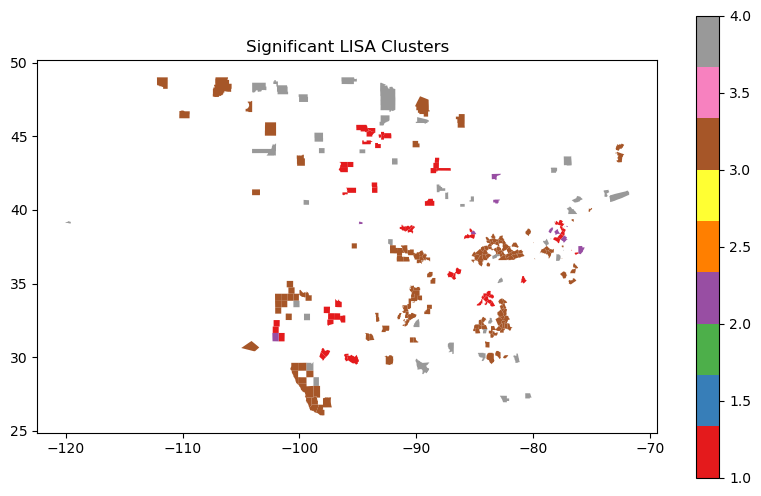

In [194]:
# Add LISA results to GeoDataFrame
from splot.esda import lisa_cluster
# Calculate LISA
from esda.moran import Moran_Local
lisa = Moran_Local(income, wq)
merged_df['lisa_sig'] = lisa.p_sim < 0.05
merged_df['lisa_cluster'] = lisa.q  # Quadrant classification: 1-4

# Significant clusters map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_df[merged_df['lisa_sig']].plot(column='lisa_cluster', 
                                      cmap='Set1', 
                                      legend=True, 
                                      ax=ax)
ax.set_title("Significant LISA Clusters")
plt.show()


4.Spatial Regression